In [206]:
import numpy as np
from numpy.linalg import norm, qr, svd, cond
from numpy.random import random
from numpy import diag
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)

## QR decomposition
Gram-Schmidt

In [207]:
def qr_decomp(A):
    A = np.array(A, dtype = np.float64)
    Q, R = np.zeros(A.shape, dtype = np.float64), \
           np.zeros(A.shape, dtype = np.float64)
    for k in range(A.shape[0]):
        ak = A[:, k].reshape(-1)
        uk  = ak
        for i in range(k):
            ei = Q[:, i]
            uk -= (ak @ ei) * ei
            
        ek = normalized(uk)
        Q[:, k] = ek
        for i in range(k, A.shape[0]):
            ai = A[:, i].reshape(-1)
            R[k, i] = ai @ ek
            
    return Q, R
    
def normalized(v):
    return v / norm(v)

## Testing implementation

In [208]:
for i in [3, 5, 15, 25, 50, 250]:
    A = np.random.rand(i, i)
    ## mine
    Q1, R1 = qr_decomp(A)
    ## numpy's
    Q2, R2 = qr(A)
    
    qClose = np.allclose(np.abs(Q1), np.abs(Q2))
    rClose = np.allclose(np.abs(Q1), np.abs(Q2))
    
    print(f'Mine and nump\'s qr decomposition are close: {qClose and rClose}, for matrix of size {i}')

Mine and nump's qr decomposition are close: True, for matrix of size 3
Mine and nump's qr decomposition are close: True, for matrix of size 5
Mine and nump's qr decomposition are close: True, for matrix of size 15
Mine and nump's qr decomposition are close: True, for matrix of size 25
Mine and nump's qr decomposition are close: True, for matrix of size 50
Mine and nump's qr decomposition are close: True, for matrix of size 250


## Generating matrices with given condition number

We can quite easily generate matrix with given condition number using SVD:
$$A = U \cdot S \cdot V_h $$
S is diagonal matrix with singular values, which we can set to whatever we need to achieve given condition rate. 

Now if only we had some way to get two orthonormal matrices $U$ and $V_h$ ..

QR decomposition! We can take two random real matrices, decompose them and take found Q matrices. We can do that because we know that Q matrices from QR decomposition are orhonormal.

In [211]:
def matr_condition_coeff(size, coeff):
    U, _ = qr(random((size, size)))
    Vh, _ = qr(random((size, size)))
    s = np.linspace(coeff, 1, size)
    S = diag(s)
    
    return U @ S @ Vh

def error(A):
    Q, _ = qr_decomp(A)
    n    = A.shape[0]
    return norm(np.eye(n) - Q.T @ Q)

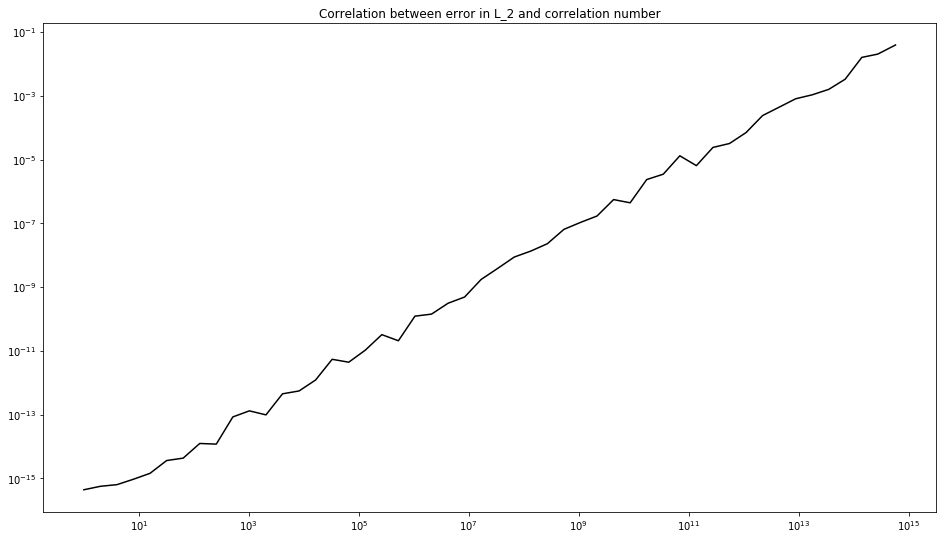

In [221]:
xs, ys = [], []

for i in range(50):
    A = matr_condition_coeff(8, 2 ** i)
    xs.append(cond(A))
    ys.append(error(A))
    
plt.xscale("log")
plt.yscale("log")
plt.title('Correlation between error in L_2 and correlation number')
plt.plot(xs, ys, color='black')

## Correlation between error in $L_2$ norm and condition number

Gram-Schmidtt algorithm whilst easy to implement is unstable numerically. Namely vectors in Q matrix ($e_i$ in my implementation) should be orthonormal, but because of rounding errors which are accumulated via this sum

`for i in range(k):
    ei = Q[:, i]
    uk -= (ak @ ei) * ei` 
    
they might not quite be. Plot above shows that very behaviour: with increasing condition number, error given by $||I - Q^T \cdot Q ||$ (in $L_2$ norm) also increases.

## Solving overdetermined system of equations

Using ordinary least squares we can find that for a problem 
$$ Ax \approx b $$the approxmiate solution is given by
$$ x = (A^T A)^{-1} A^T b $$

Now using the QR decomposion, we can show with basic algebra that approxmiate solution is given by
$$ x \approx R^{-1}Q^Tb $$ 
Which is the same as solving 
$$ Rx = Q^Tb $$

In [298]:
def solve(A, b):
    Q, R = qr(A)
    return np.linalg.solve(R, Q.T @ b)
  
def ols_solve(xs, ys):
    n = len(xs)
    xs = np.array(xs, dtype = np.float64)
    A = np.empty((n, 3))
    
    A[:, 0] = xs ** 2
    A[:, 1] = xs 
    A[:, 2] = 1.0
    b = np.array(ys, dtype = np.float64).reshape(-1, 1)
    
    return solve(A, b)

def plot_solve(xs, ys):
    a, b, c = ols_solve(xs, ys)
    xaxis = np.linspace(min(xs) - 2, max(xs) + 2, 100)
    yaxis = a * (xaxis ** 2) + b * xaxis + c
    
    plt.plot(xs, ys, 'bo', color = 'red', markersize = 20)
    plt.plot(xaxis, yaxis, color = 'black', linewidth = 2)
    plt.draw()

 #### Here is an example

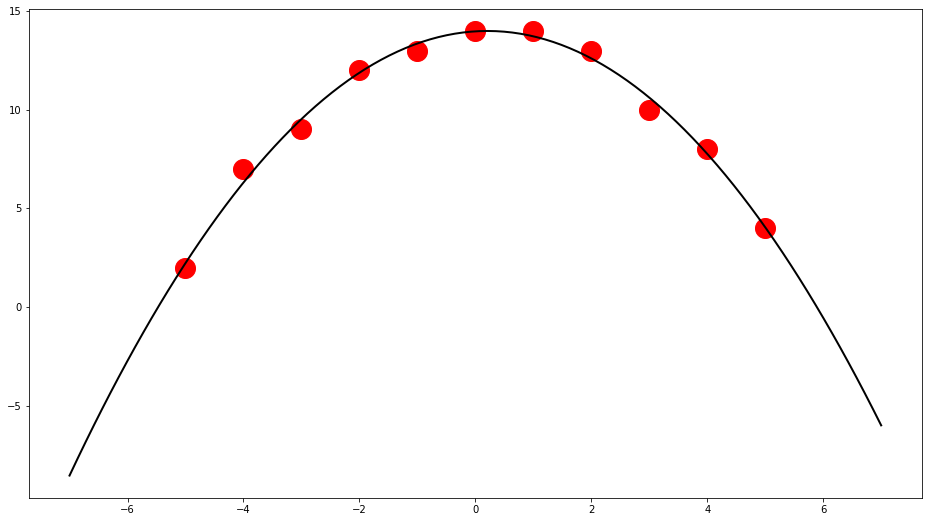

In [302]:
xs = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
ys = [2, 7, 9, 12, 13, 14, 14, 13, 10,8, 4]  

plot_solve(xs, ys)